# Python kick-off

The Python standard library is documented at https://docs.python.org/3/library/ and include basic functions like `print`.

Specialised tools, such as pandapower, are usually made available in other libraries (modules).
For example NumPy (http://www.numpy.org/) functions for numerical computation, very similar to what we can do in MATLAB.

To use a function from a module we need to make it available in our program , what is called as 'importing'. 

In [1]:
import pandapower as pp
from pandapower.plotting import simple_plotly, pf_res_plotly

In [2]:
import numpy as np
import copy

Basic functionalities of Python

In [3]:
#Declare and call a function
def sum_and_increment(a, b):
    """"Return the sum of a and b, plus 1"""
    return a + b + 1
# N.B. Python is sensible to indentation!!

# Call the function
m = sum_and_increment(3, 4)
print(m)  # Expect 8

8


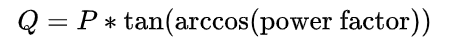

In [4]:
def get_reactive(P,PF):
    """" Calculate reactive power from Active power and Power Factor """
    return P*np.tan(np.arccos(PF))

In [5]:
def get_per_km_value(a,L,Z_b):
    """" Calculate physical quantity in per km given the p.u. value """
    return a*Z_b/L

# Basic types:

In [6]:
my_string = "This is a string."
print(my_string)
print(type(my_string))

This is a string.
<class 'str'>


In [7]:
# Get 3rd character (Python counts from zero!)
s2 = my_string[2]
print(s2)
print(type(s2))

i
<class 'str'>


In [8]:
x = True
print(type(x))

name = 'Sara'
print(type(name))

age = 20
print(type(age))

money = 20.
print(type(money))

<class 'bool'>
<class 'str'>
<class 'int'>
<class 'float'>


In [9]:
text_string = "My name is {} and I am {} years old and I have {} bucks.".format(name, age, money)
print(text_string)

My name is Sara and I am 20 years old and I have 20.0 bucks.


# Simple Data Structures

`list`. Similar to `array` in Matlab but can contain different types of variables:

In [10]:
empty = [] #create an empty list
empty

[]

In [11]:
list0 = ['Sara', 20, 20.]
list0

['Sara', 20, 20.0]

In [12]:
list1 = [name, age, money]
list1

['Sara', 20, 20.0]

Let's iterate over a `list`:

In [13]:
for element in list1:
    print(element)

Sara
20
20.0


Let's use the function `enumerate` to get the position and the element of the list

In [14]:
for position, element in enumerate(list1):
    text_string = 'The element number {} of the list is {}.'.format(position+1, element)
    print(text_string)

The element number 1 of the list is Sara.
The element number 2 of the list is 20.
The element number 3 of the list is 20.0.


Indexing in a `list`:

In [15]:
third_element = list1[2]
print(third_element)

20.0


`tuple`. Like a `list` but once assigned values cannot be changed.

In [16]:
tuple_1 = ('Sara', 20, 20.)
tuple_1

('Sara', 20, 20.0)

`dictionary`

In [17]:
dictionary1 = {'name': 'Sara', 'age': 20 , 'money': 20.}
print(dictionary1)
print(dictionary1.keys())
print(dictionary1.values())

{'name': 'Sara', 'age': 20, 'money': 20.0}
dict_keys(['name', 'age', 'money'])
dict_values(['Sara', 20, 20.0])


# Pandas

Most popular Python library for data analysis

In [18]:
import pandas as pd

`DataFrame` is like a `table` in Matlab. 

To create a `DataFrame` we can pass a `dictionary` to the function inside pandas library `pd.DataFrame()`

In [19]:
dictionary1 = {'Product_A': [50, 47], 'Product_B': [131, 120]}
df = pd.DataFrame(dictionary1)
df

,Product_A,Product_B
0,50,131
1,47,120


In [20]:
df.index=['Seller_1', 'Seller_2']
df

,Product_A,Product_B
Seller_1,50,131
Seller_2,47,120


What I am doing here is to look inside the `DataFrame` and look at the `attribute` that shows indexes

There are several ways to access data of a DataFrame. For more info: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [21]:
df.Product_A #attribute

Seller_1    50
Seller_2    47
Name: Product_A, dtype: int64

To get the first row of data we can use `iloc` (Index-based selection)

In [22]:
df.iloc[0] #the order is row-column

Product_A     50
Product_B    131
Name: Seller_1, dtype: int64

In [23]:
df.iloc[:,0]

Seller_1    50
Seller_2    47
Name: Product_A, dtype: int64

In [24]:
print(type(df.iloc[0]))

<class 'pandas.core.series.Series'>


A series is like a vector of a table, or like a `DataFrame` of just one column.

Or `loc` (Label-based selection): 

In [25]:
df

,Product_A,Product_B
Seller_1,50,131
Seller_2,47,120


In [26]:
df.loc['Seller_1'] #the order is row-column

Product_A     50
Product_B    131
Name: Seller_1, dtype: int64

In [27]:
df.loc[:,'Product_A']

Seller_1    50
Seller_2    47
Name: Product_A, dtype: int64

Let's take another DataFrame

In [28]:
df1 = pd.DataFrame({'P1': [0, 1], 'P2': [2, 3]})
df1

,P1,P2
0,0,2
1,1,3


`append` method adds rows to a `DataFrame`

In [29]:
df2 = pd.DataFrame({'P1': [40, 100], 'P2': [20, 30]})
df1 = df1.append(df2, ignore_index= True)

# Data analysis

`loc` canalso accept `booleans`: this is pretty useful when we want to access data based on particular logic conditions.

Let's say we want to get the row of the seller that sells the product A < 50

In [30]:
df.Product_A < 50

Seller_1    False
Seller_2     True
Name: Product_A, dtype: bool

In [31]:
df.loc[df.Product_A < 50]

,Product_A,Product_B
Seller_2,47,120


This can be useful for many applications

# Data visualization

In [32]:
import matplotlib.pyplot as plt

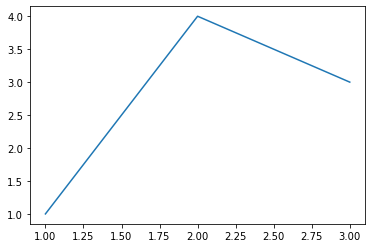

In [33]:
plt.plot([1,2,3],[1,4,3])

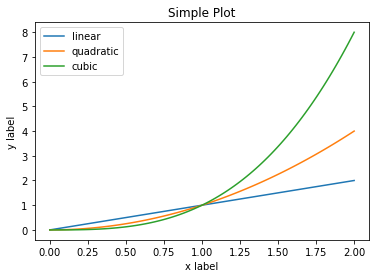

In [34]:
x = np.linspace(0, 2, 100) # Generate 100 evenly spaced numbers from 0 to 2

plt.plot(x, x, label='linear')  # Plot some data on the axes.
plt.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
plt.plot(x, x**3, label='cubic')  # ... and some more.
plt.xlabel('x label')  # Add an x-label to the axes.
plt.ylabel('y label')  # Add a y-label to the axes.
plt.title("Simple Plot")  # Add a title to the axes.
plt.legend()  # Add a legend.

# Pandapower

In [35]:
import numba

In [36]:
net = pp.create_empty_network()

Get pandapower standard library parameters

In [37]:
pp.available_std_types(net, element="trafo")
#pp.available_std_types(net, element="line")

,i0_percent,pfe_kw,vkr_percent,sn_mva,vn_lv_kv,vn_hv_kv,vk_percent,shift_degree,vector_group,tap_side,tap_neutral,tap_min,tap_max,tap_step_degree,tap_step_percent,tap_phase_shifter
160 MVA 380/110 kV,0.0600,60.00,0.2500,160.00,110.0,380.0,12.2,0,Yy0,hv,0,-9,9,0,1.5,False
100 MVA 220/110 kV,0.0600,55.00,0.2600,100.00,110.0,220.0,12.0,0,Yy0,hv,0,-9,9,0,1.5,False
63 MVA 110/20 kV,0.0400,22.00,0.3200,63.00,20.0,110.0,18.0,150,YNd5,hv,0,-9,9,0,1.5,False
40 MVA 110/20 kV,0.0500,18.00,0.3400,40.00,20.0,110.0,16.2,150,YNd5,hv,0,-9,9,0,1.5,False
25 MVA 110/20 kV,0.0700,14.00,0.4100,25.00,20.0,110.0,12.0,150,YNd5,hv,0,-9,9,0,1.5,False
63 MVA 110/10 kV,0.0400,22.00,0.3200,63.00,10.0,110.0,18.0,150,YNd5,hv,0,-9,9,0,1.5,False
40 MVA 110/10 kV,0.0500,18.00,0.3400,40.00,10.0,110.0,16.2,150,YNd5,hv,0,-9,9,0,1.5,False
25 MVA 110/10 kV,0.0700,14.00,0.4100,25.00,10.0,110.0,12.0,150,YNd5,hv,0,-9,9,0,1.5,False
0.25 MVA 20/0.4 kV,0.3200,0.80,1.4400,0.25,0.4,20.0,6.0,150,Yzn5,hv,0,-2,2,0,2.5,False
0.4 MVA 20/0.4 kV,0.3375,1.35,1.4250,0.40,0.4,20.0,6.0,150,Dyn5,hv,0,-2,2,0,2.5,False


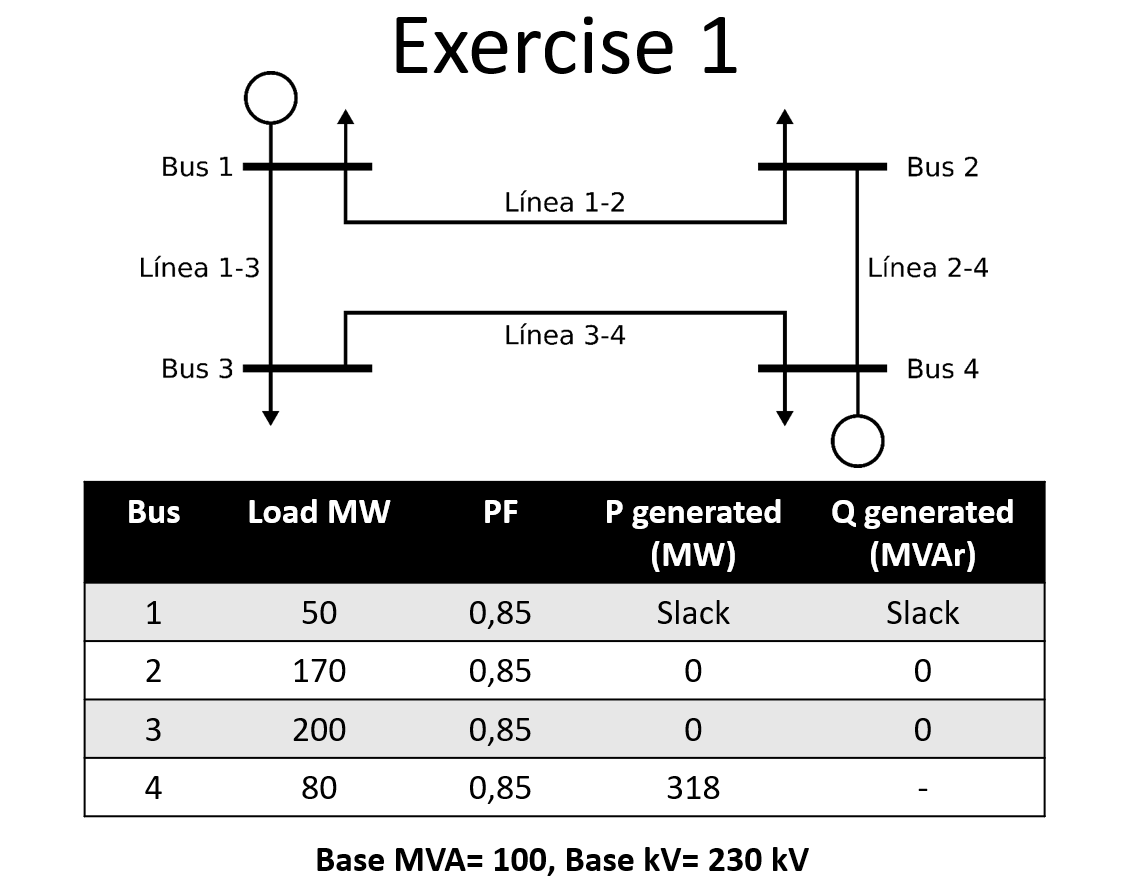

In [38]:
PF = 0.85 #Power Factor

# Buses

In [39]:
bus1 = pp.create_bus(net, name="Bus 1", vn_kv=230)
bus2 = pp.create_bus(net, name="Bus 2", vn_kv=230)
bus3 = pp.create_bus(net, name="Bus 3", vn_kv=230)
bus4 = pp.create_bus(net, name="Bus 4", vn_kv=230)

In [40]:
net.bus

,name,vn_kv,type,zone,in_service
0,Bus 1,230.0,b,None,True
1,Bus 2,230.0,b,None,True
2,Bus 3,230.0,b,None,True
3,Bus 4,230.0,b,None,True


In [41]:
# Bus 1 Slack
pp.create_ext_grid(net, bus1)
# Functions return the unique ID of the created element

0

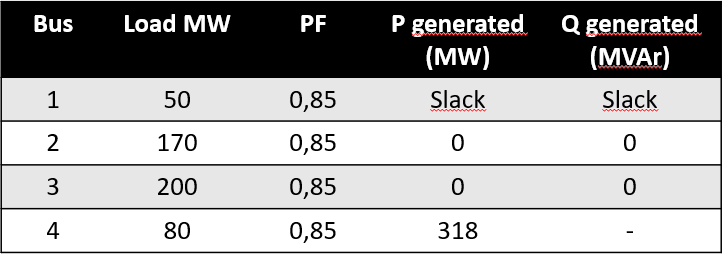

In [42]:
# Bus 1 Load
p_mw = 50
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus1, p_mw, q_mvar)

# Bus 2 Load
p_mw = 170
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus2, p_mw, q_mvar)

# Bus 3 Load
p_mw = 200
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus3, p_mw, q_mvar)

# Bus 4 Load
p_mw = 80
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus4, p_mw, q_mvar)

3

In [43]:
# Bus 4 Generator
p_mw = 318
PF = 0.85
q_mvar = get_reactive(p_mw,PF)
pp.create_sgen(net, bus4, p_mw, q_mvar)

0

# Lines

In this example lines are characterized in p.u.

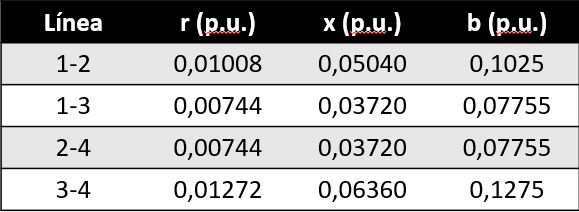

In [44]:
r1_2 = 0.01008
r1_3 = 0.00744
r2_4 = 0.00744
r3_4 = 0.01272

x1_2 = 0.05040
x1_3 = 0.03720
x2_4 = 0.03720
x3_4 = 0.06360

Pandapower needs lines parameters in physical units per km and the lenght of the lines.

<img style="float: center;" src="lines_input.png" width="60%">

Since data are in p.u. we have to translate the information into pandapower accepted format.

<img style="float: center;" src="Base_values.png" width="50%">

<img style="float: center;" src="Base_impedance.png" width="20%"> 

In [45]:
Z_b = 230**2/100
Z_b

529.0

If we suppose a medium lenght line L = 100km we cannot neglect capacitance C [nF], which becomes more and more importante the more the line is long. 

Let's suppose a typical capacitance of C = 18,2 nF/km for all lines

In [46]:
L = 100
c_nf_km = 18.2 

Let's suppose also the maximum thermal current to be 0.960 kA. 

In [47]:
max_i_ka = 0.960

In [48]:
r1_2_km = get_per_km_value(r1_2,L,Z_b)
r1_3_km = get_per_km_value(r1_3,L,Z_b)
r2_4_km = get_per_km_value(r2_4,L,Z_b)
r3_4_km = get_per_km_value(r3_4,L,Z_b)

x1_2_km = get_per_km_value(x1_2,L,Z_b)
x1_3_km = get_per_km_value(x1_3,L,Z_b)
x2_4_km = get_per_km_value(x2_4,L,Z_b)
x3_4_km = get_per_km_value(x3_4,L,Z_b)

In [49]:
pp.create_line_from_parameters(net, from_bus = bus1, to_bus = bus2, length_km = L, r_ohm_per_km = r1_2_km, x_ohm_per_km = x1_2_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=12)
pp.create_line_from_parameters(net, from_bus = bus1, to_bus = bus3, length_km = L, r_ohm_per_km = r1_3_km, x_ohm_per_km = x1_3_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=13)
pp.create_line_from_parameters(net, from_bus = bus2, to_bus = bus4, length_km = L, r_ohm_per_km = r2_4_km, x_ohm_per_km = x2_4_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=24)
pp.create_line_from_parameters(net, from_bus = bus3, to_bus = bus4, length_km = L, r_ohm_per_km = r3_4_km, x_ohm_per_km = x3_4_km, c_nf_per_km = c_nf_km , max_i_ka = max_i_ka, name=34)

3

In [50]:
net

This pandapower network includes the following parameter tables:
   - bus (4 elements)
   - load (4 elements)
   - sgen (1 element)
   - ext_grid (1 element)
   - line (4 elements)

In [51]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,None,0,50.0,30.987217,0.0,0.0,NaN,1.0,True,None
1,None,1,170.0,105.356538,0.0,0.0,NaN,1.0,True,None
2,None,2,200.0,123.948868,0.0,0.0,NaN,1.0,True,None
3,None,3,80.0,49.579547,0.0,0.0,NaN,1.0,True,None


In [52]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,None,3,318.0,197.0787,NaN,1.0,True,None,True


In [53]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,12,None,0,1,100.0,0.053323,0.266616,18.2,0.0,0.96,1.0,1,None,True
1,13,None,0,2,100.0,0.039358,0.196788,18.2,0.0,0.96,1.0,1,None,True
2,24,None,1,3,100.0,0.039358,0.196788,18.2,0.0,0.96,1.0,1,None,True
3,34,None,2,3,100.0,0.067289,0.336444,18.2,0.0,0.96,1.0,1,None,True


In [54]:
net.bus

,name,vn_kv,type,zone,in_service
0,Bus 1,230.0,b,None,True
1,Bus 2,230.0,b,None,True
2,Bus 3,230.0,b,None,True
3,Bus 4,230.0,b,None,True


Imagine I want to access the voltage of the 4th bus from my network

Remember of the label-based selection `loc`

In [55]:
net.bus.loc[3, 'vn_kv']

230.0

In [56]:
pp.runpp(net)

In [57]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-136.866552,16.853168
1,1.002465,-1.192685,170.000000,105.356538
2,0.983781,-2.010679,200.000000,123.948868
3,1.045729,1.117781,-238.000000,-147.499153


In [58]:
net.res_load

,p_mw,q_mvar
0,50.0,30.987217
1,170.0,105.356538
2,200.0,123.948868
3,80.0,49.579547


In [59]:
net.res_sgen

,p_mw,q_mvar
0,318.0,197.0787


In [60]:
net.res_ext_grid

,p_mw,q_mvar
0,186.866552,14.134049


What is the efficiency of the grid?

In [61]:
dem = sum(net.res_load['p_mw'])
dem

500.0

In [62]:
inj = sum(net.res_sgen['p_mw']) + sum(net.res_ext_grid['p_mw'])
inj 

504.8665516038442

In [63]:
eff = dem/inj
eff

0.990360716929287

Create a function that gives me the efficiency of the power system:

In [64]:
def get_eff(net):
    return sum(net.res_load['p_mw'])/(sum(net.res_sgen['p_mw']) + sum(net.res_ext_grid['p_mw']))

# Transformer

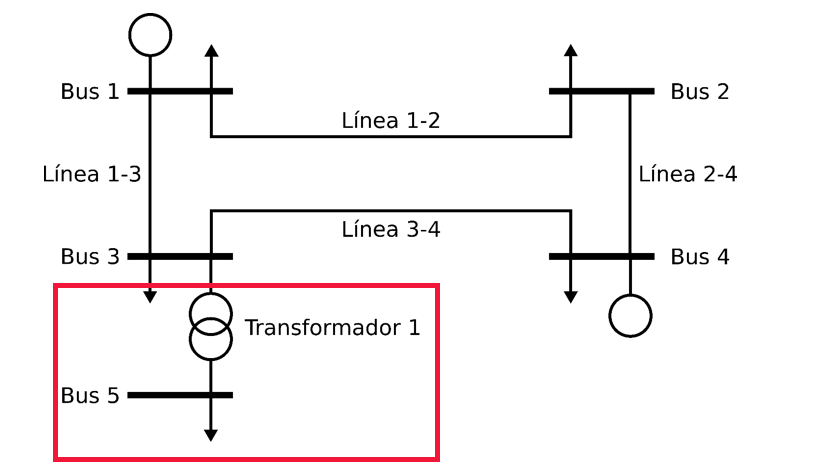

<img style="float: center;" src="transformer_input.png" width="70%">  

In [65]:
net1 = pp.pandapowerNet(copy.deepcopy(net)) #Let's create a new netF

In [66]:
bus5 = pp.create_bus(net1, name="Bus 5", vn_kv=25)

# Bus 5 Load
p_mw = 80
q_mvar=get_reactive(p_mw, PF=0.6)
pp.create_load(net1, bus5, p_mw, q_mvar)

4

This type of transformer is not present in the pandapower library: have to characterize it through the apposite function create_transformer_from_parameters (https://pandapower.readthedocs.io/en/v2.4.0/elements/trafo.html)

<img style="float: center;" src="transformer_function.png" width="60%">                               

In this case I look at the library in order to get realistic parameters such as the real part of the relative short-circuit voltage, iron losses and open loop losses.

In [67]:
pp.create_transformer_from_parameters(net1, hv_bus = bus3, lv_bus = bus5, sn_mva = 150, vn_hv_kv = net1.bus.iloc[2].vn_kv, vn_lv_kv = net1.bus.iloc[4].vn_kv, vkr_percent = 0.25, vk_percent = 7, pfe_kw = 0, i0_percent = 0)

0

In [68]:
pp.runpp(net1)

In [69]:
net1.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-220.780012,-123.437665
1,0.986933,-1.523062,170.000000,105.356538
2,0.937712,-3.138184,200.000000,123.948868
3,1.019708,0.654082,-238.000000,-147.499153
4,0.878709,-5.609676,80.000000,106.666667


Several buses are now out of voltage acceptable range (+-10%)!

What is the new efficiency of the system?

In [70]:
get_eff(net1)

0.9850877893047725

Lower than previously!

# Shunt Reactance

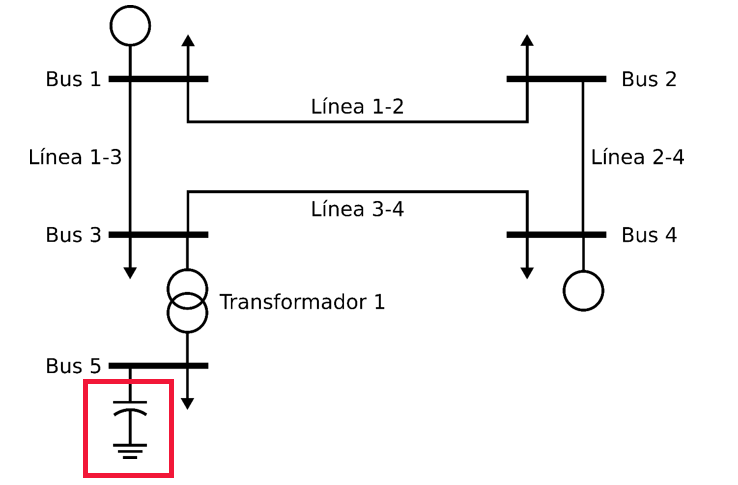

In [71]:
net2 = pp.pandapowerNet(copy.deepcopy(net1))

How much shunt reactance we are going to add to on bus 5 in order to lower the undervoltage?

In [72]:
pp.create_shunt(net2, bus5, q_mvar = -90, p_mw=0.0)

0

In [73]:
pp.runpp(net2)

In [74]:
net2.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-218.894013,-22.861008
1,0.997146,-1.629627,170.000000,105.356538
2,0.968015,-3.348857,200.000000,123.948868
3,1.036761,0.405275,-238.000000,-147.499153
4,0.953714,-5.639294,80.000000,24.805308


In [75]:
get_eff(net2)

0.9882533931835445

Let's suppose we want to increase the load at bus 2 (without changing the PF). At which level of the load the voltage at this bus goes below 0.9 p.u.?

In [76]:
net3 = pp.pandapowerNet(copy.deepcopy(net2))
# PF = 0.85

Let's use a while cycle:

In [77]:
load = []
voltage = []
df = []
S = pd.DataFrame(columns = ['Load [MW]','Voltage Bus 2 [kV]']) #The Dataframe has to be initialized if we want to append!
while net3.res_bus.loc[1, 'vm_pu'] > 0.9:
    net3.load.loc[1,'p_mw'] = net3.load.loc[1,'p_mw'] + 10 #increase the load
    net3.load.loc[1,'q_mvar'] = get_reactive(net3.load.loc[1,'p_mw'],PF) #update the reactive load
    try:
        pp.runpp(net3) # repeat the powerflow
        load = net3.load.loc[1,'p_mw']
        voltage = net3.res_bus.loc[1,'vm_pu']
        #Create a dataframe with the new solution
        df = pd.DataFrame({'Load [MW]': [load], 'Voltage Bus 2 [kV]': [voltage] })
        S = S.append(df, ignore_index = True)
    except:
        pass

In [78]:
net3.load.loc[1,'p_mw']

430.0

Let's plot the result:

Text(0.5, 1.0, 'Evolution of the Voltage with increasing Load')

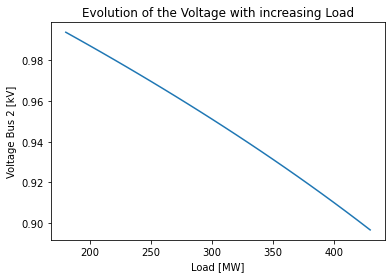

In [79]:
plt.plot(S.loc[:,'Load [MW]'], S.loc[:, 'Voltage Bus 2 [kV]'])
plt.xlabel('Load [MW]') 
plt.ylabel('Voltage Bus 2 [kV]')  
plt.title('Evolution of the Voltage with increasing Load')

Increasing too much the load can jeopardize the stability of the system.

At what value of the voltage there is instability?

In [80]:
PF = 0.85
net3 = pp.pandapowerNet(copy.deepcopy(net2))

In [81]:
def get_evolution_voltage(net):
    load = []
    voltage = []
    df = []
    S = pd.DataFrame(columns = ['Load [MW]','Voltage Bus 2 [kV]']) #The Dataframe has to be initialized if we want to append!
    while net.res_bus.loc[1, 'vm_pu'] > 0.7:
        net.load.loc[1,'p_mw'] = net.load.loc[1,'p_mw'] + 10 #increase the load
        net.load.loc[1,'q_mvar'] = get_reactive(net.load.loc[1,'p_mw'],PF) #update the reactive load
        try:
            pp.runpp(net) # repeat the powerflow
            load = net.load.loc[1,'p_mw']
            voltage = net.res_bus.loc[1,'vm_pu']
            #Create a dataframe with the new solution
            df = pd.DataFrame({'Load [MW]': [load], 'Voltage Bus 2 [kV]': [voltage] })
            S = S.append(df, ignore_index = True)
        except:
            pass
    return [S,voltage]

In [82]:
[S,voltage] = get_evolution_voltage(net3)

In [83]:
voltage

0.6900703024141146

In [84]:
load

430.0

Text(0.5, 1.0, 'Evolution of the Voltage with increasing Load')

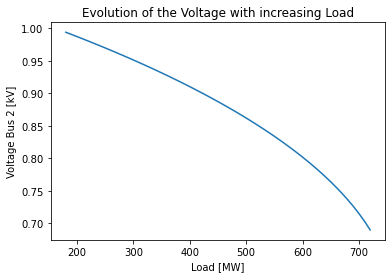

In [85]:
plt.plot(S.loc[:,'Load [MW]'], S.loc[:, 'Voltage Bus 2 [kV]'])
plt.xlabel('Load [MW]') 
plt.ylabel('Voltage Bus 2 [kV]')  
plt.title('Evolution of the Voltage with increasing Load')

What if we change the power factor?

In [86]:
net4 = pp.pandapowerNet(copy.deepcopy(net2))

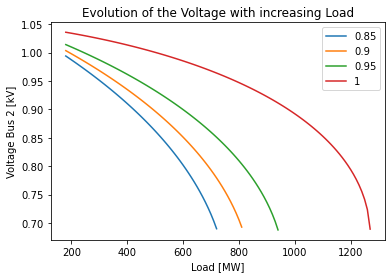

In [87]:
PF = 0.85
while PF <= 1:
    net4 = pp.pandapowerNet(copy.deepcopy(net2)) #reinitialize the network
    net4.load.loc[1,'q_mvar'] = get_reactive(net4.load.loc[1,'p_mw'],PF) #update the reactive load
    pp.runpp(net4)
    [S,voltage] = get_evolution_voltage(net4)
    PF = PF + 0.05
    plt.plot(S.loc[:,'Load [MW]'], S.loc[:, 'Voltage Bus 2 [kV]'])

plt.xlabel('Load [MW]') 
plt.ylabel('Voltage Bus 2 [kV]')  
plt.title('Evolution of the Voltage with increasing Load')
plt.legend([0.85,0.9,0.95,1])